In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:\\Users\\dellf\\OneDrive\\Desktop\\ml\\ML_LAB_61\\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df = pd.read_csv("C:\\Users\\dellf\\OneDrive\\Desktop\\ml\\ML_LAB_61\\Mall_Customers.csv", usecols = ['CustomerID','Annual Income (k$)','Spending Score (1-100)'])
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

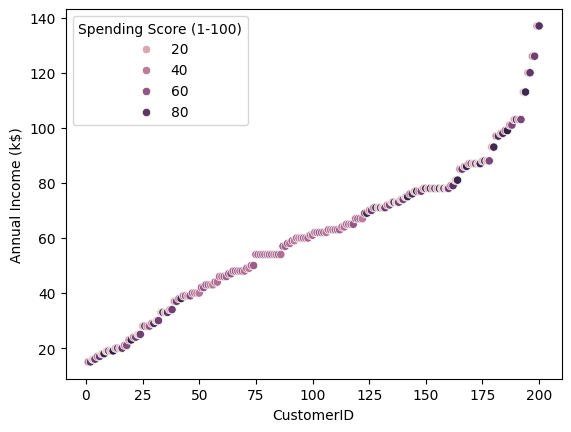

In [9]:
import seaborn as sns

sns.scatterplot(data = df, x = 'CustomerID', y = 'Annual Income (k$)', hue = 'Spending Score (1-100)')

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['CustomerID', 'Annual Income (k$)']], df[['Spending Score (1-100)']], test_size=0.33, random_state=0)

In [11]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [13]:
from sklearn.cluster import KMeans


In [14]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

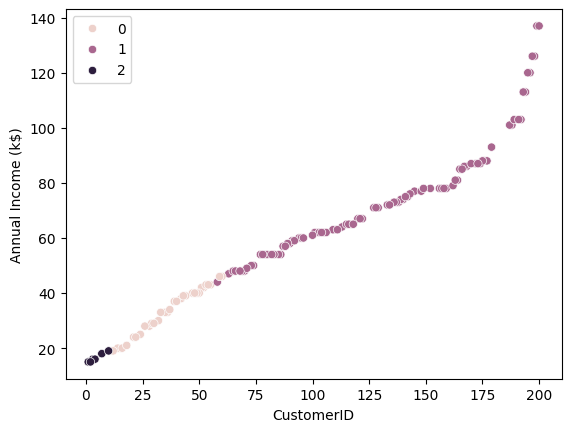

In [17]:
sns.scatterplot(data = X_train, x = 'CustomerID', y = 'Annual Income (k$)', hue = kmeans.labels_)

<Axes: ylabel='Spending Score (1-100)'>

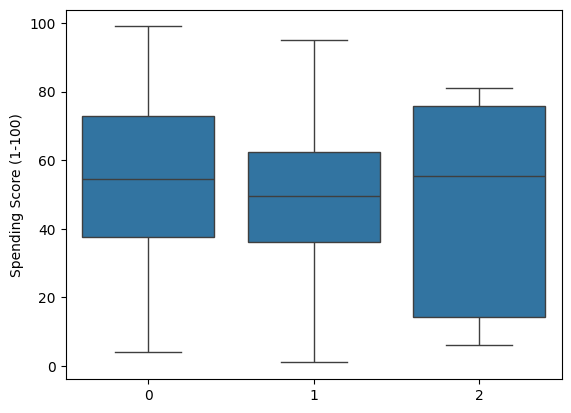

In [18]:
sns.boxplot(x = kmeans.labels_, y = y_train['Spending Score (1-100)'])

In [19]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.6640626657509292

In [20]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

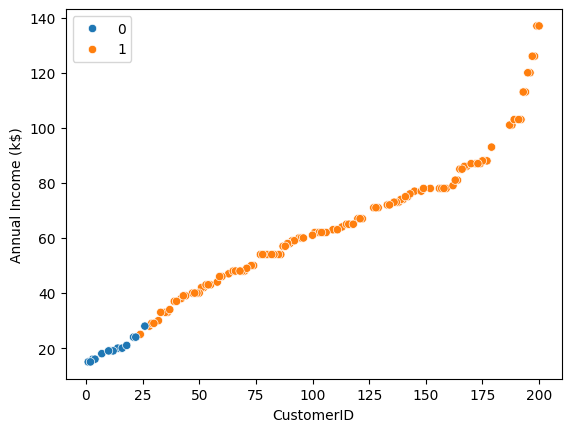

In [21]:
sns.scatterplot(data = X_train, x = 'CustomerID', y = 'Annual Income (k$)', hue = fits[0].labels_)

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

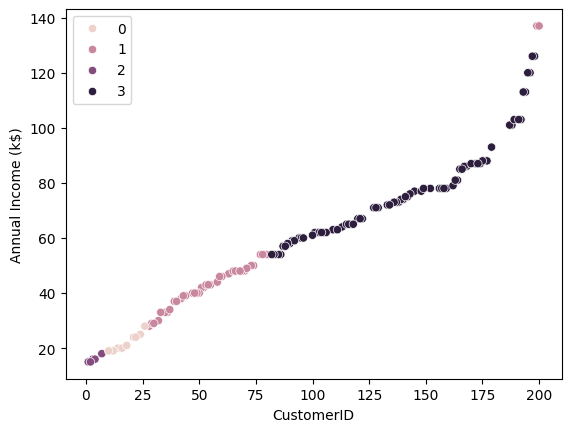

In [22]:
sns.scatterplot(data = X_train, x = 'CustomerID', y = 'Annual Income (k$)', hue = fits[2].labels_)

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

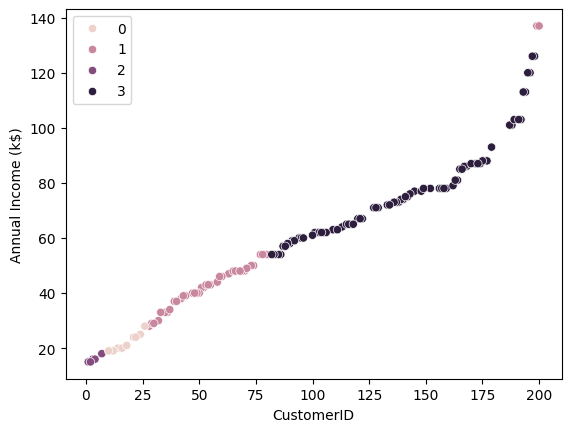

In [23]:
sns.scatterplot(data = X_train, x = 'CustomerID', y = 'Annual Income (k$)', hue = fits[2].labels_)

<Axes: >

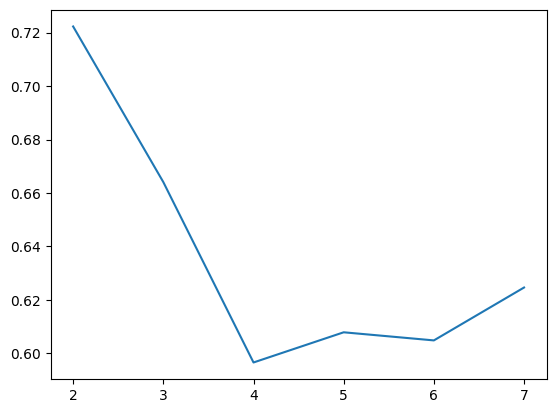

In [24]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

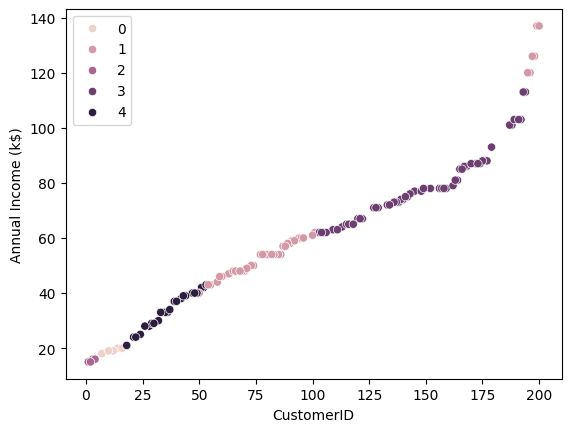

In [25]:
sns.scatterplot(data = X_train, x = 'CustomerID', y = 'Annual Income (k$)', hue = fits[3].labels_)

<Axes: ylabel='Spending Score (1-100)'>

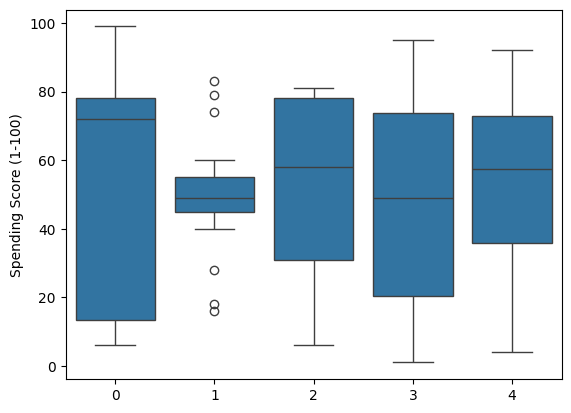

In [26]:
sns.boxplot(x = fits[3].labels_, y = y_train['Spending Score (1-100)'])